# Курсовой проект по ТМО

## 1. Поиск и выбор набора данных для построения моделей машинного обучения

В качестве набора данных используется набор данных по диагностике рака молочной железы из датасетов Scikit-learn.

Датасет состоит из одной таблицы, содержащей содержащей информацию о следующих атрибутах:

- radius - радиус, среднее расстояние от центра до точек по периметру
- texture - текстура, стандартное отклонение значений оттенков серого
- perimeter - периметр
- area - площадь
- smoothness - гладкость, локальное изменение длины радиуса
- compactness - компактность, высчитывается по формуле: perimeter^2 / area - 1.0
- concavity - вогнутость, выраженность вогнутых участков контура
- concave points - вогнутые точки, количество вогнутых частей контура
- symmetry - симметрия
- fractal dimension - фрактальная размерность («приближение береговой линии» - 1)
Среднее значение, стандартная ошибка и «наихудшее» (среднее из трех самых больших значений) этих признаков были рассчитаны для каждого изображения, что дало 30 признаков. Признаки вычисляются из оцифрованного изображения аспирата тонкой иглы массы груди. Они описывают характеристики ядер клеток, присутствующих на изображении.

Целевой признак - target (0, если опухоль злокачественная, и 1, если доброкачественная).

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

In [2]:
sklearn_data = load_breast_cancer()
data = pd.DataFrame(data=np.c_[sklearn_data['data'], sklearn_data['target']],
                   columns=np.append(sklearn_data['feature_names'], ['target']))

## 2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных

In [3]:
# Первые 5 строк датасета
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
# Размер датасета
data.shape

(569, 31)

In [5]:
# Список колонок
data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [6]:
# Список колонок с типами данных 
data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [7]:
# Проверим наличие пустых значений
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Набор данных не содержит пропусков.

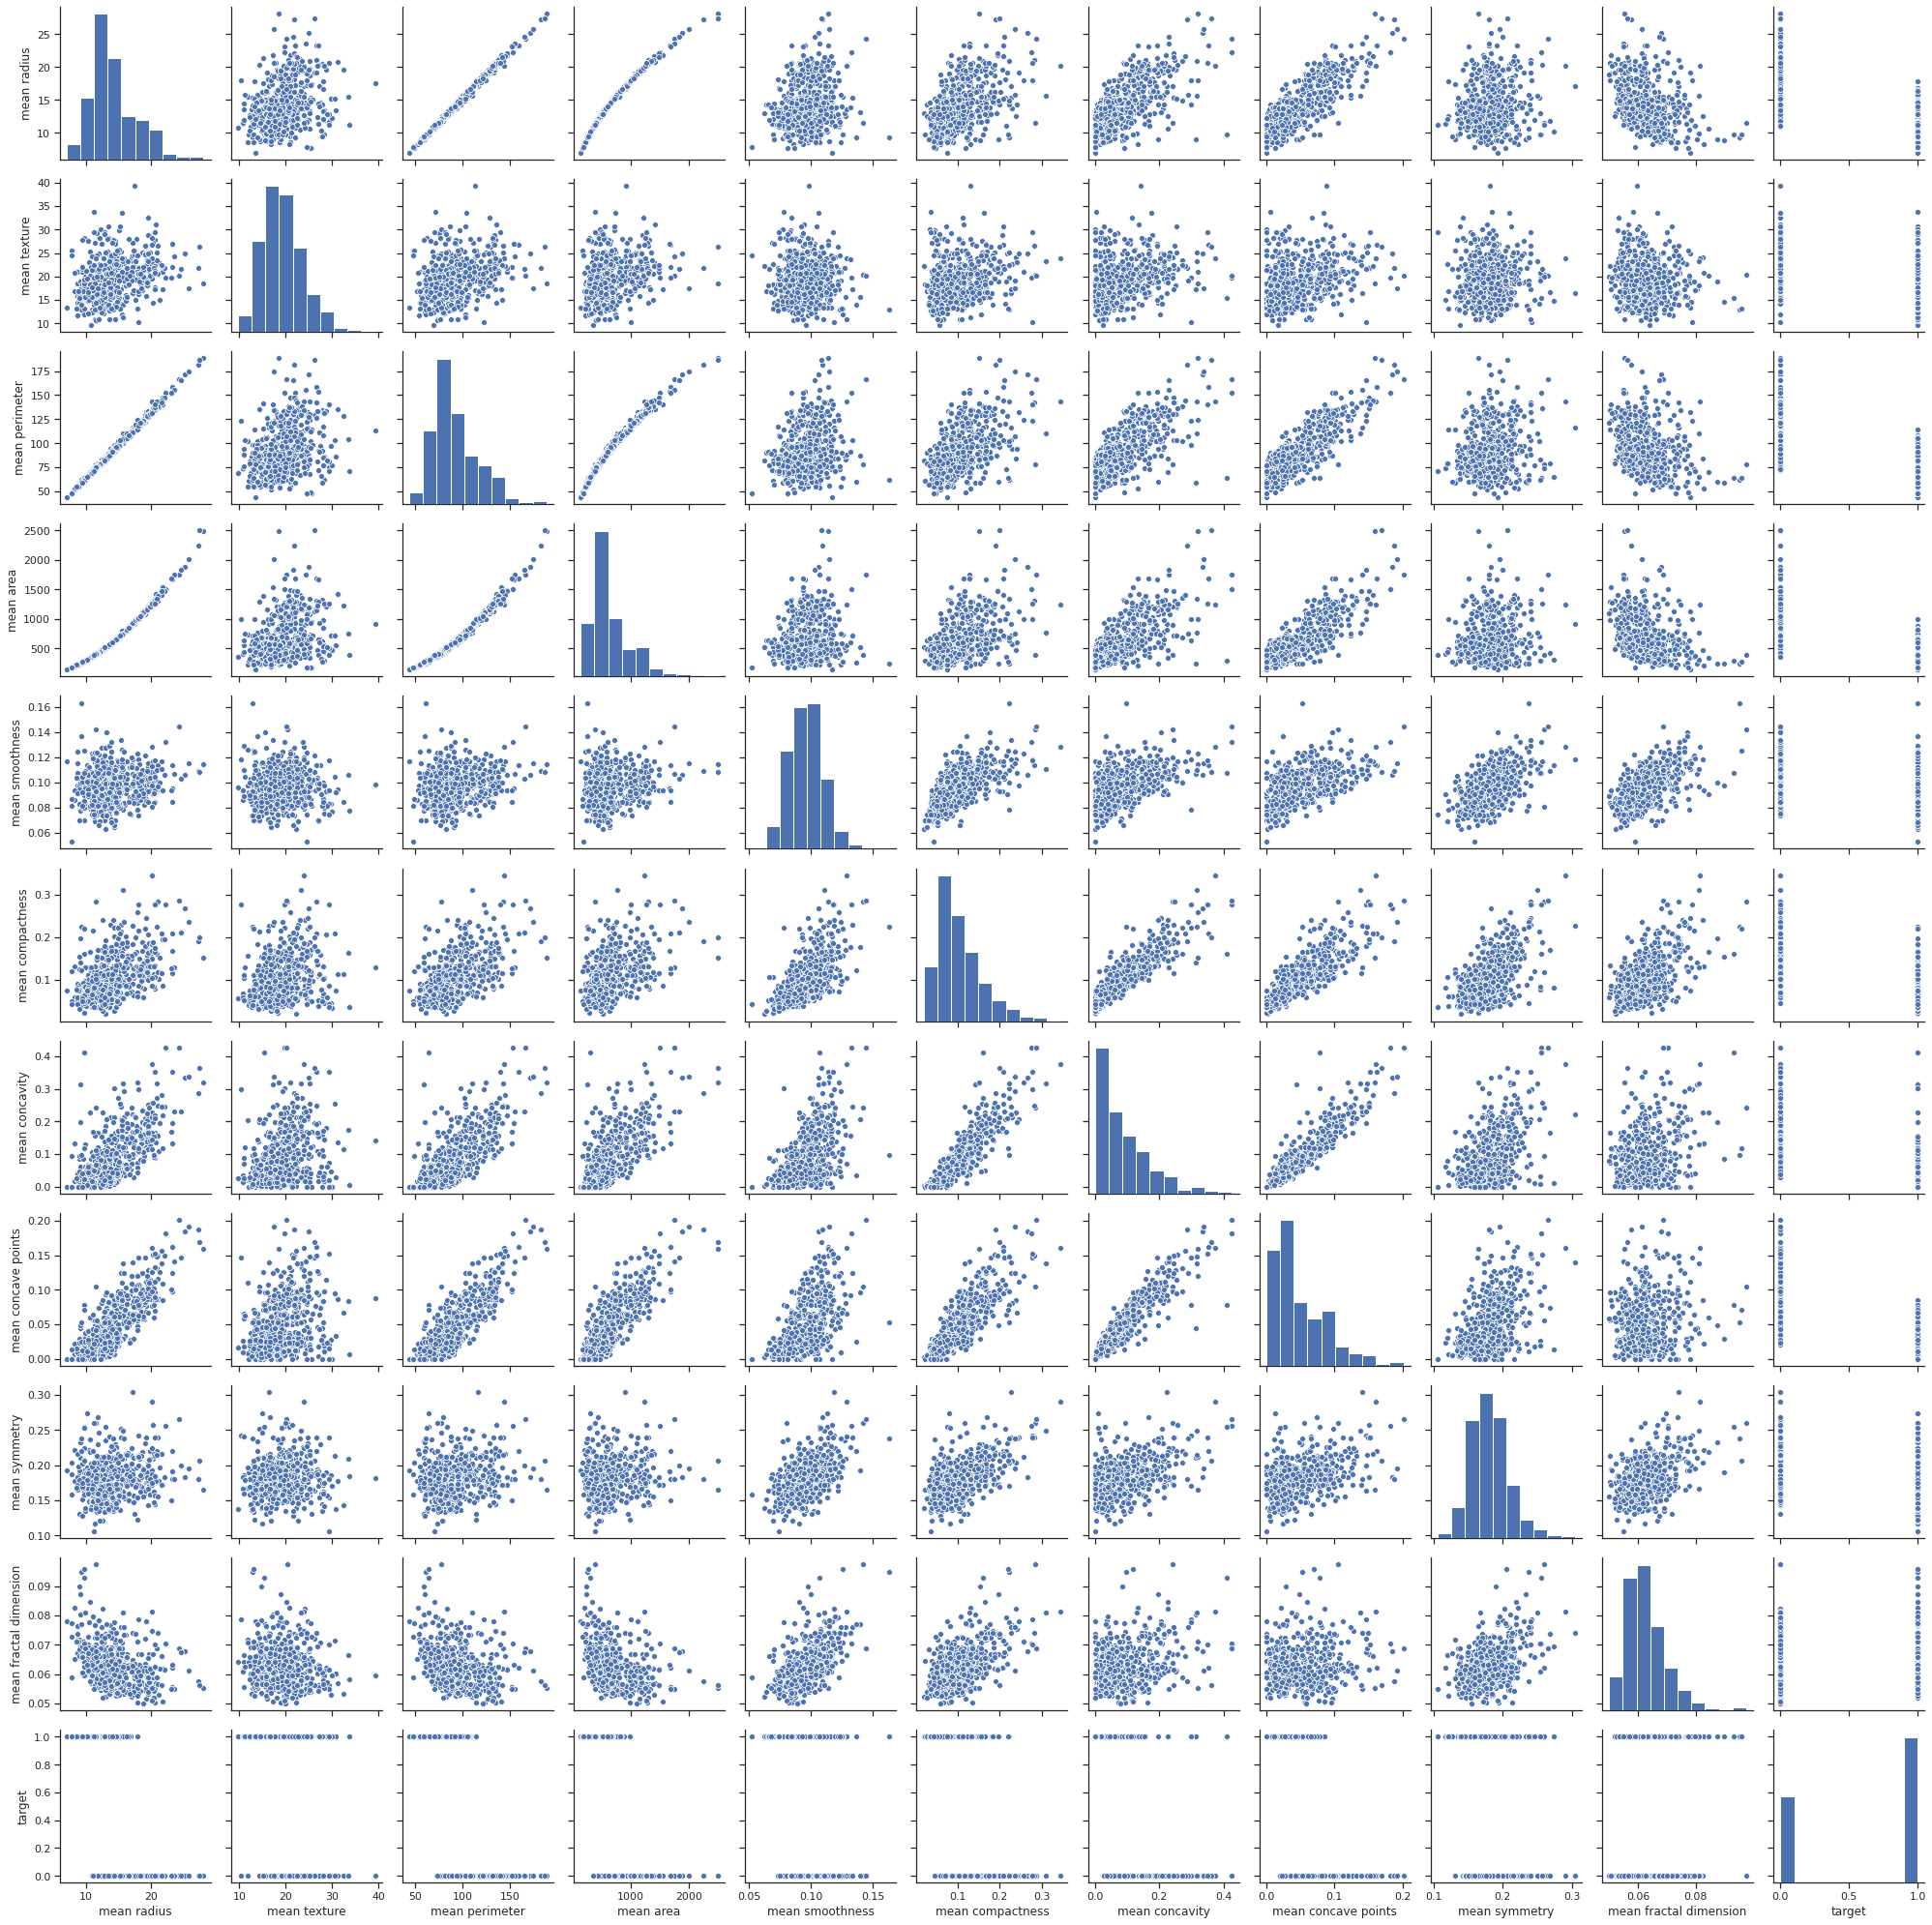

In [8]:
# Построим парные диаграммы для средних значений атрибутов
data1 = data[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry',
              'mean fractal dimension', 'target']]
sns.pairplot(data1)

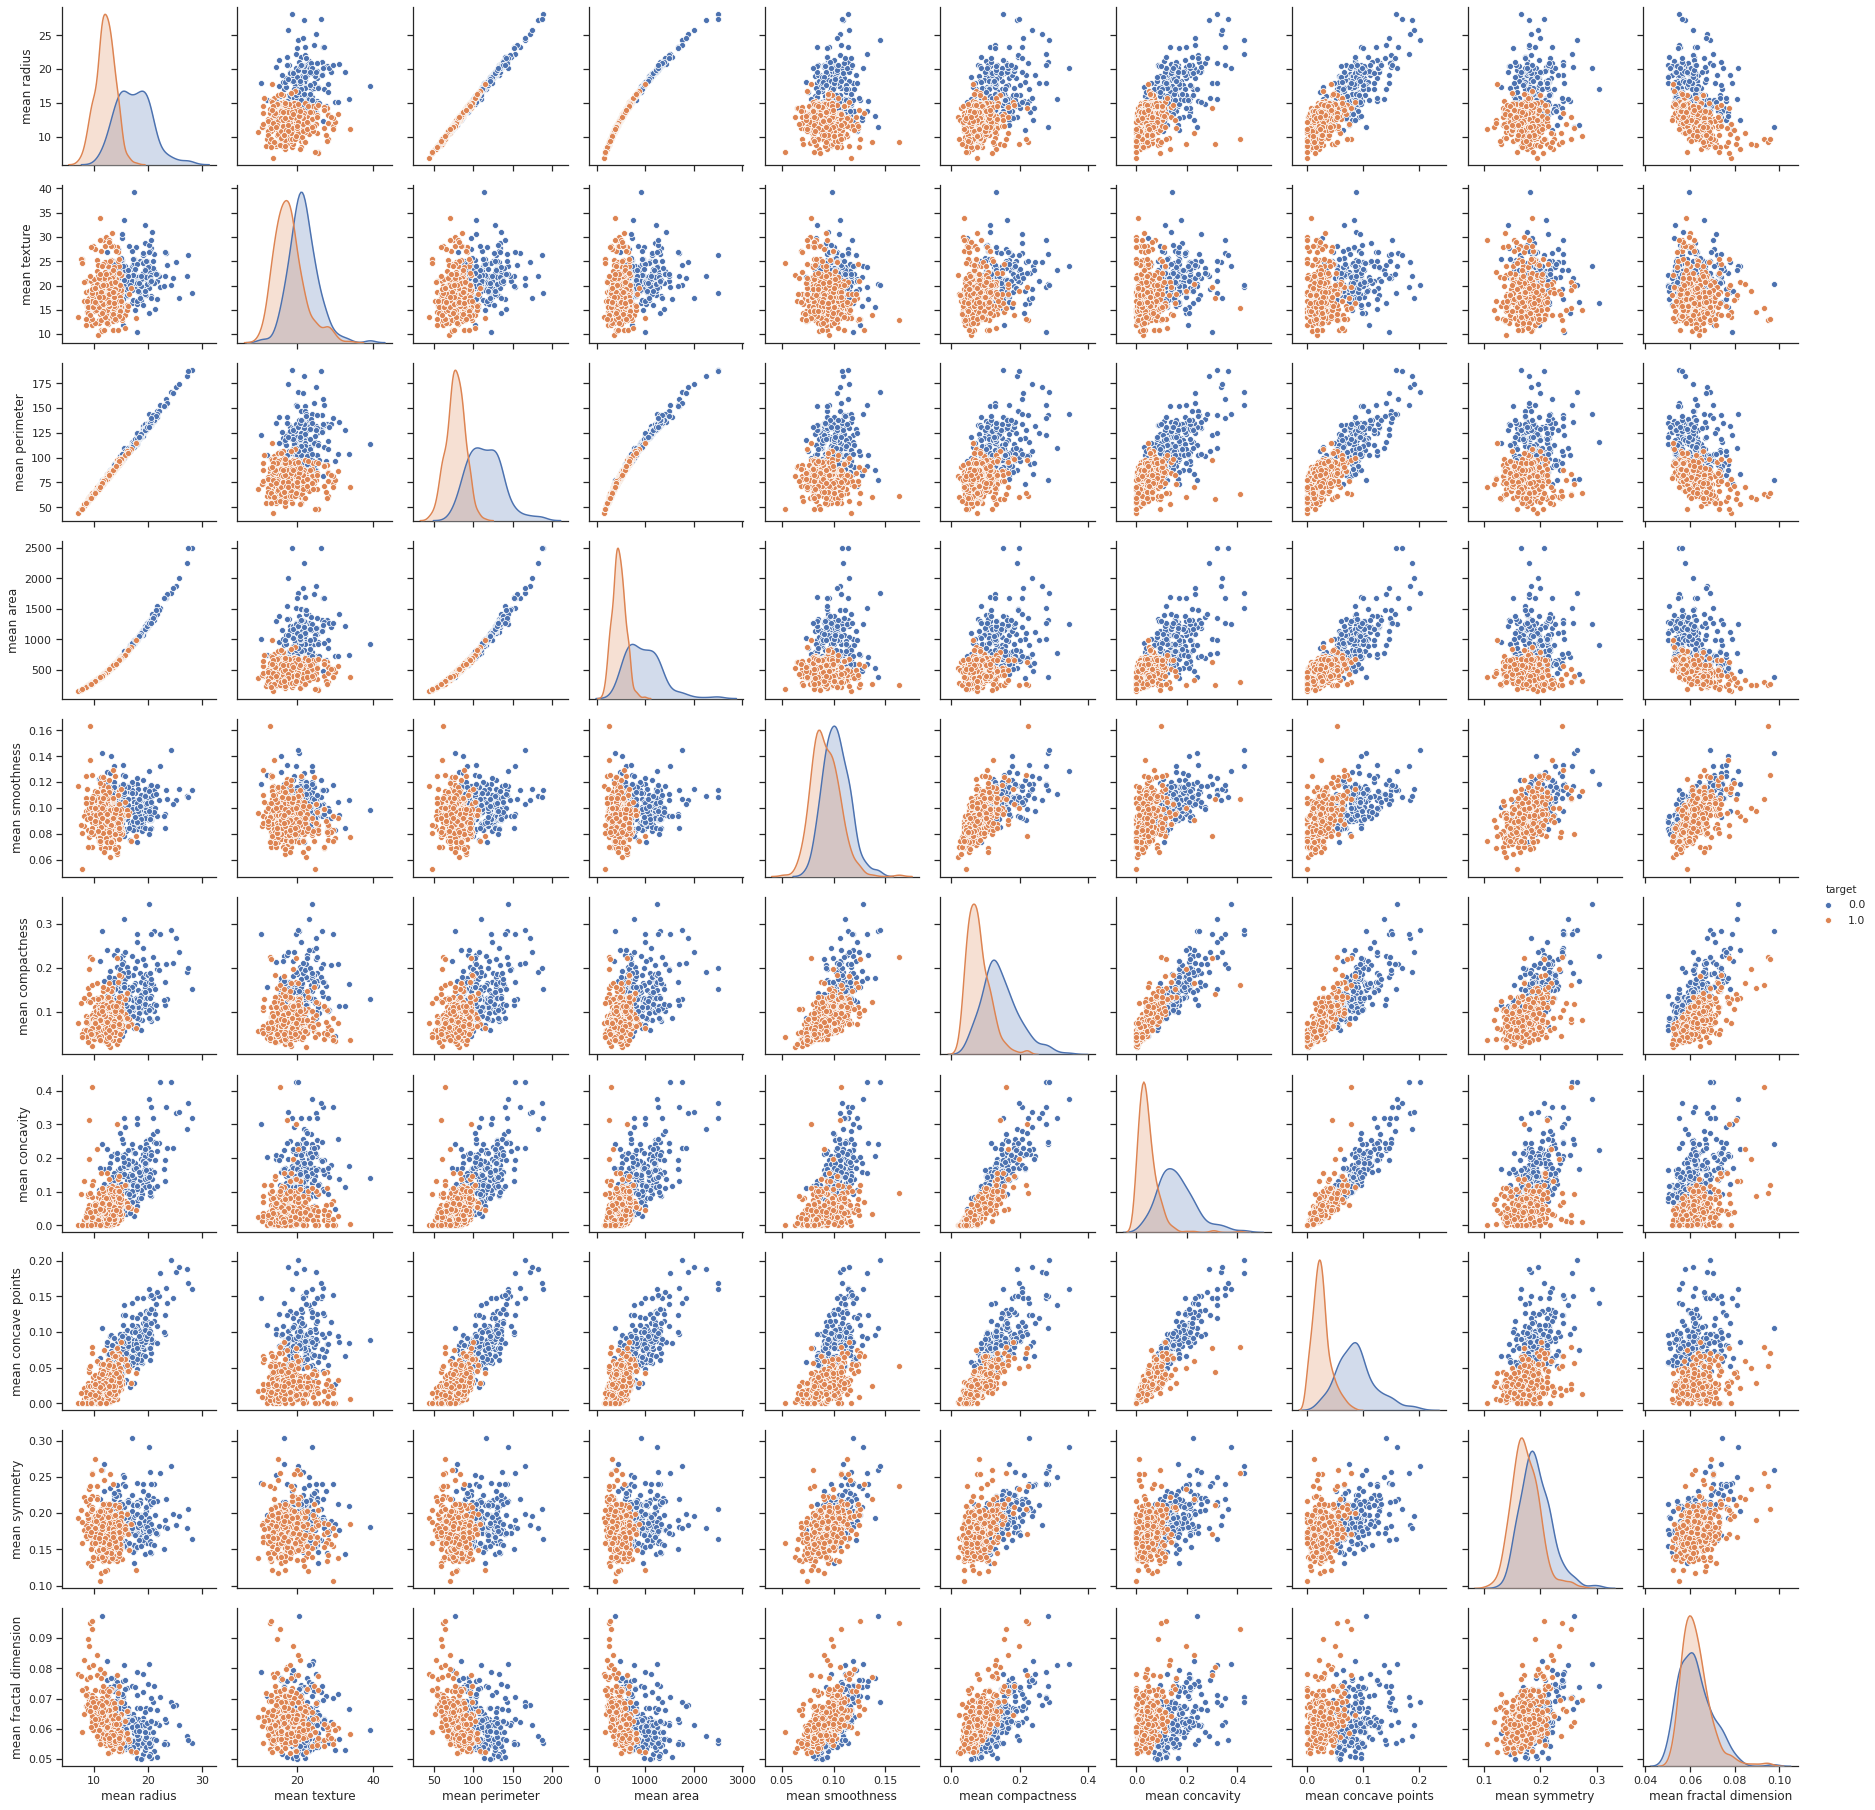

In [9]:
sns.pairplot(data1, hue='target')

In [10]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['target'].unique()

array([0., 1.])

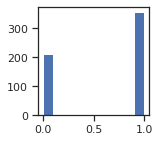

In [11]:
# Оценим дисбаланс классов для target
fig, ax = plt.subplots(figsize=(2,2)) 
plt.hist(data['target'])
plt.show()

In [12]:
data['target'].value_counts()

1.0    357
0.0    212
Name: target, dtype: int64

In [13]:
# Посчитаем дисбаланс классов
total = data.shape[0]
class_0, class_1 = data['target'].value_counts()
print('Класс 1 составляет {}%, а класс 0 составляет {}%.'
      .format(round(class_0 / total, 4)*100, round(class_1 / total, 4)*100))

Класс 1 составляет 62.739999999999995%, а класс 0 составляет 37.26%.


Диcбаланс классов для целевого признака небольшой.

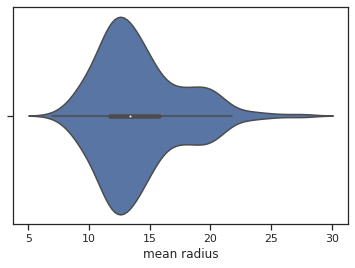

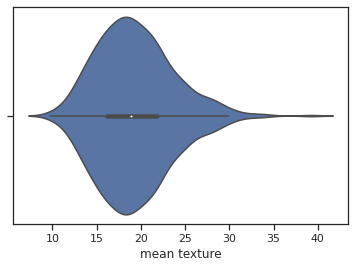

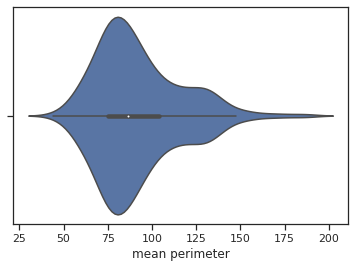

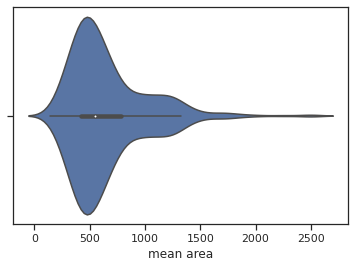

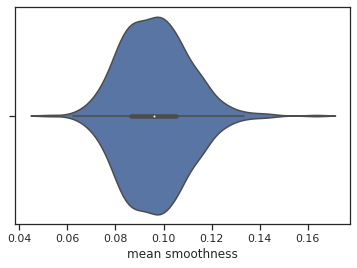

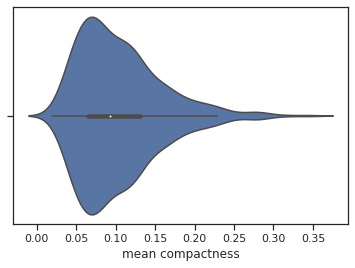

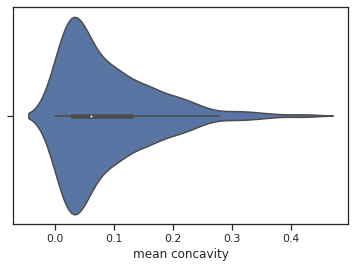

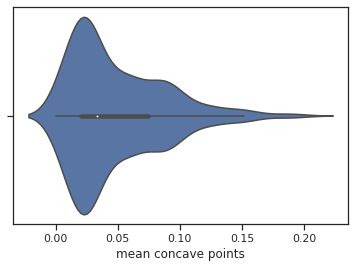

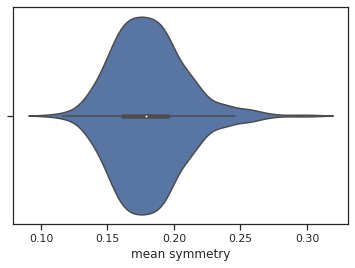

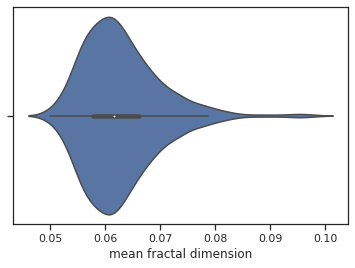

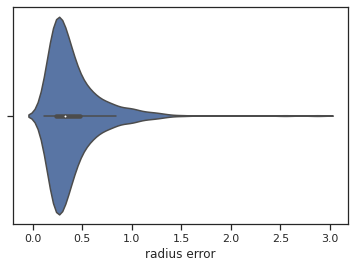

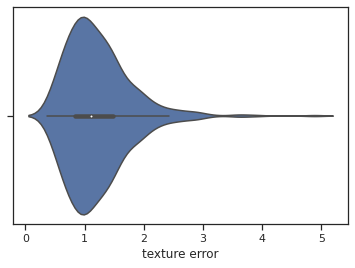

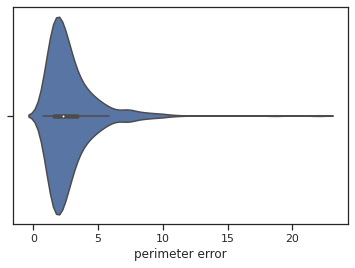

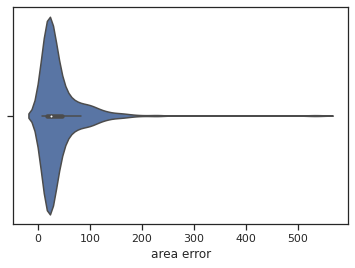

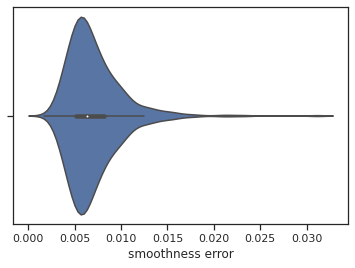

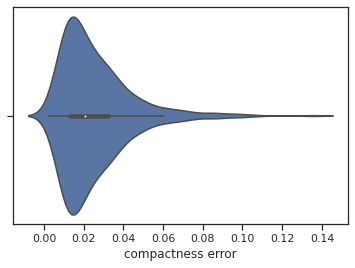

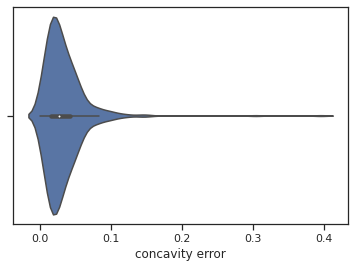

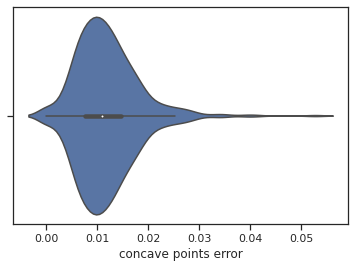

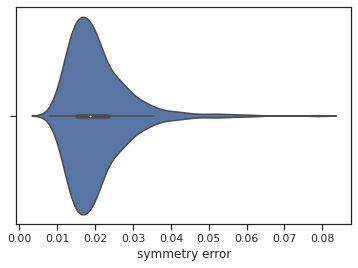

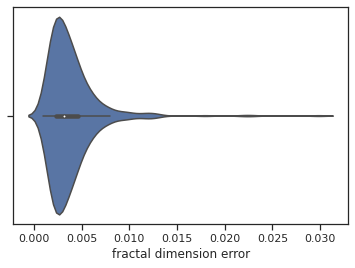

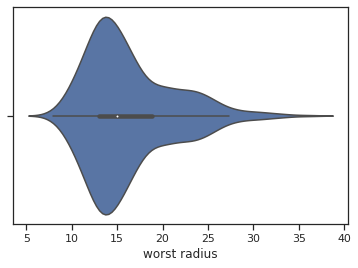

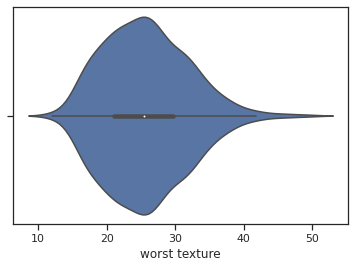

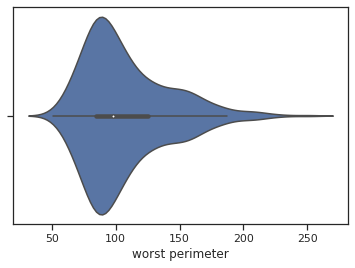

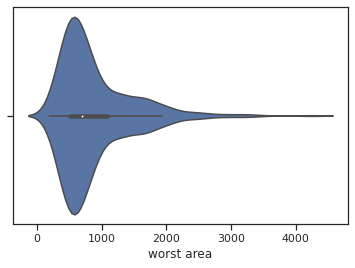

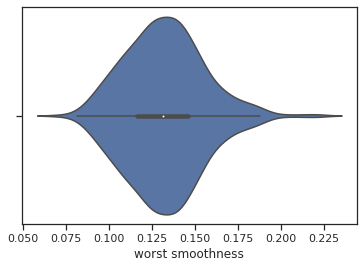

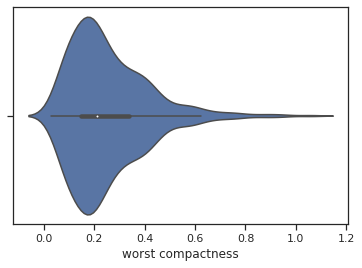

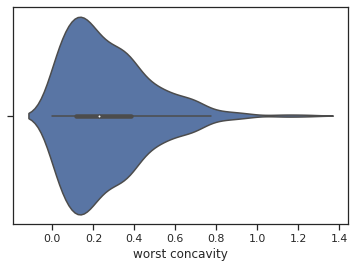

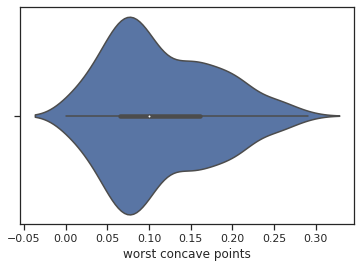

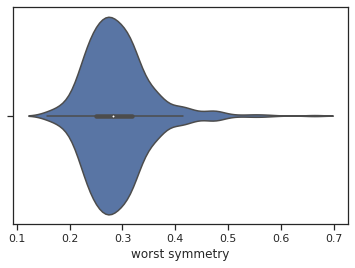

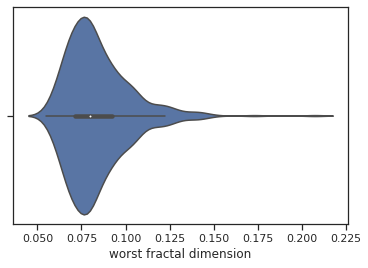

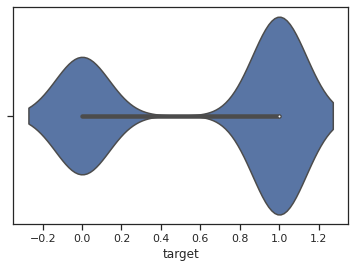

In [14]:
# Скрипичные диаграммы для числовых колонок
for col in data.columns:
    sns.violinplot(x=data[col])
    plt.show()

## 3. Проведение корреляционного анализа данных. Выбор признаков, подходящих для построения моделей

Определим корреляцию признаков.

In [15]:
data.corr(method='pearson')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


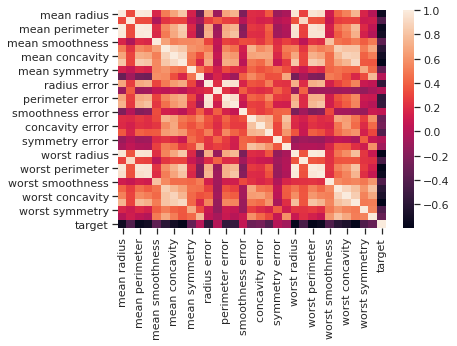

In [16]:
sns.heatmap(data.corr())

Из матрицы корреляции и тепловой карты можно сделать следующие выводы:

1. Наиболее сильно с целевым признаком коррелируют радиус (0.73), периметр (0.74), площадь (0.71), компактность (0.6), вогнутость (0.7) и вогнутые точки (0.78) (как среднее значение, так и стандартная ошибка с худшим значением). Однако радиус, периметр и площадь сильно коррелируют между собой, т.к. периметр и площадь напрямую зависят от радиуса, поэтому в модели следует оставить лишь один из этих признаков, который сильнее коррелирует с целевым. В данном случае коэффициенты корреляции почти одинаковые, но у периметра он чуть выше. Причем средний периметр и худший периметр сильно коррелируют между собой (0.97), поэтому оставим худший периметр, у которого корреляция с целевым признаком 0.78, и стандартную ошибку периметра с корреляцией 0.56.
2. Также довольно сильно коррелируют компактность, вогнутость и вогнутые точки, поэтому в модели по тому же принципу можно оставить только вогнутые точки. Причем среднее значение сильно коррелирует с худшим, поэтому оставим только худшее значение и стандартную ошибку.
3. Также оставим худшее значение гладкости с корреляцией 0.42 и худшее значение симметрии с корреляцией 0.41.
4. Остальные признаки довольно слабо коррелируют с целевым признаком. Уберем их из модели.

Таким образом, оставим следующие признаки:
- perimeter error
- worst perimeter
- worst smoothness
- concave points error
- worst concave points
- worst symmetry

In [17]:
data = data[['perimeter error', 'worst perimeter', 'worst smoothness', 'concave points error',
             'worst concave points', 'worst symmetry', 'target']]
data.head()

,perimeter error,worst perimeter,worst smoothness,concave points error,worst concave points,worst symmetry,target
0,8.589,184.60,0.1622,0.01587,0.2654,0.4601,0.0
1,3.398,158.80,0.1238,0.01340,0.1860,0.2750,0.0
2,4.585,152.50,0.1444,0.02058,0.2430,0.3613,0.0
3,3.445,98.87,0.2098,0.01867,0.2575,0.6638,0.0
4,5.438,152.20,0.1374,0.01885,0.1625,0.2364,0.0


## 4. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей

In [18]:
data.dtypes

perimeter error         float64
worst perimeter         float64
worst smoothness        float64
concave points error    float64
worst concave points    float64
worst symmetry          float64
target                  float64
dtype: object

Категориальные признаки отсутствуют, их кодирования не требуется. Исключением является признак target, но он уже закодирован на основе подхода LabelEncoding.

### Масштабирование данных

In [19]:
# Числовые колонки для масштабирования
scale_cols = ['perimeter error', 'worst perimeter', 'worst smoothness', 'concave points error',
              'worst concave points', 'worst symmetry']

In [20]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [21]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [22]:
data.head()

,perimeter error,worst perimeter,worst smoothness,concave points error,worst concave points,worst symmetry,target,perimeter error_scaled,worst perimeter_scaled,worst smoothness_scaled,concave points error_scaled,worst concave points_scaled,worst symmetry_scaled
0,8.589,184.60,0.1622,0.01587,0.2654,0.4601,0.0,0.369034,0.668310,0.601136,0.300625,0.912027,0.598462
1,3.398,158.80,0.1238,0.01340,0.1860,0.2750,0.0,0.124440,0.539818,0.347553,0.253836,0.639175,0.233590
2,4.585,152.50,0.1444,0.02058,0.2430,0.3613,0.0,0.180370,0.508442,0.483590,0.389847,0.835052,0.403706
3,3.445,98.87,0.2098,0.01867,0.2575,0.6638,0.0,0.126655,0.241347,0.915472,0.353665,0.884880,1.000000
4,5.438,152.20,0.1374,0.01885,0.1625,0.2364,0.0,0.220563,0.506948,0.437364,0.357075,0.558419,0.157500


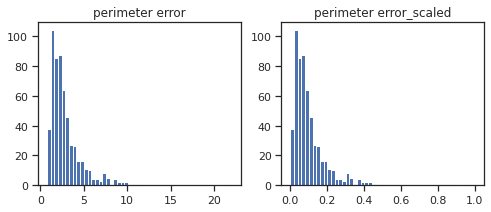

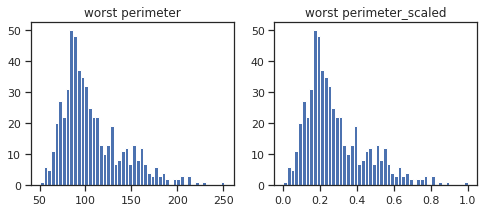

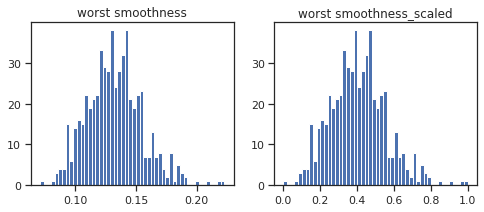

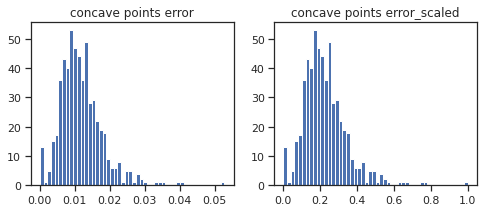

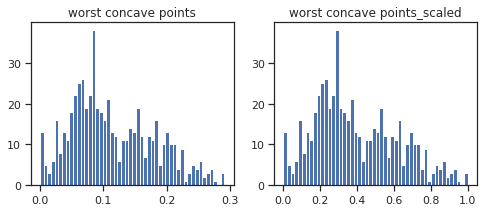

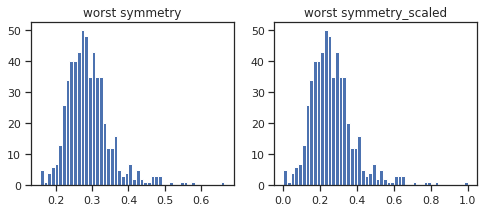

In [23]:
# Проверим, что масштабирование не повлияло на распределение данных
for col in scale_cols:
    col_scaled = col + '_scaled'

    fig, ax = plt.subplots(1, 2, figsize=(8,3))
    ax[0].hist(data[col], 50)
    ax[1].hist(data[col_scaled], 50)
    ax[0].title.set_text(col)
    ax[1].title.set_text(col_scaled)
    plt.show()

Проверим, что масштабирование не повлияло на корреляционную матрицу.

In [24]:
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['perimeter error',
 'worst perimeter',
 'worst smoothness',
 'concave points error',
 'worst concave points',
 'worst symmetry',
 'target']

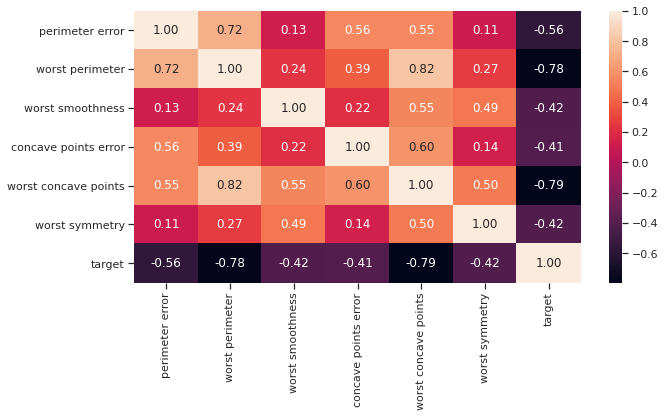

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

In [26]:
scale_cols_postfix = [x + '_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['perimeter error_scaled',
 'worst perimeter_scaled',
 'worst smoothness_scaled',
 'concave points error_scaled',
 'worst concave points_scaled',
 'worst symmetry_scaled',
 'target']

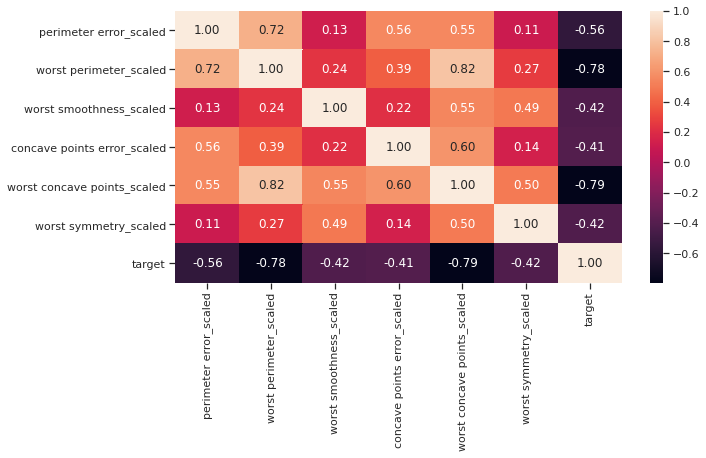

In [27]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

## 5. Выбор метрик для последующей оценки качества моделей

В качестве метрик для решения задачи классификации будем использовать:
1. Метрика precision
2. Метрика recall (полнота)
3. Метрика F1-мера
4. Метрика ROC AUC

Разработаем класс, который позволит сохранять метрики качества построенных моделей и реализует визуализацию метрик качества.

In [28]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

## 6. Выбор наиболее подходящих моделей для решения задачи

Для задачи классификации будем использовать следующие модели:
- Логистическая регрессия
- Метод ближайших соседей
- Машина опорных векторов
- Решающее дерево
- Случайный лес
- Градиентный бустинг

## 7. Формирование обучающей и тестовой выборок на основе исходного набора данных

In [29]:
data.head()

,perimeter error,worst perimeter,worst smoothness,concave points error,worst concave points,worst symmetry,target,perimeter error_scaled,worst perimeter_scaled,worst smoothness_scaled,concave points error_scaled,worst concave points_scaled,worst symmetry_scaled
0,8.589,184.60,0.1622,0.01587,0.2654,0.4601,0.0,0.369034,0.668310,0.601136,0.300625,0.912027,0.598462
1,3.398,158.80,0.1238,0.01340,0.1860,0.2750,0.0,0.124440,0.539818,0.347553,0.253836,0.639175,0.233590
2,4.585,152.50,0.1444,0.02058,0.2430,0.3613,0.0,0.180370,0.508442,0.483590,0.389847,0.835052,0.403706
3,3.445,98.87,0.2098,0.01867,0.2575,0.6638,0.0,0.126655,0.241347,0.915472,0.353665,0.884880,1.000000
4,5.438,152.20,0.1374,0.01885,0.1625,0.2364,0.0,0.220563,0.506948,0.437364,0.357075,0.558419,0.157500


In [30]:
x = data[['perimeter error_scaled', 'worst perimeter_scaled', 'worst smoothness_scaled',
          'concave points error_scaled', 'worst concave points_scaled', 'worst symmetry_scaled']]
y = data['target']

In [31]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (426, 6)
x_test: (143, 6)
y_train: (426,)
y_test: (143,)


## 8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки

In [32]:
# Модели
class_models = {'LogR': LogisticRegression(), 
                'KNN_5': KNeighborsClassifier(n_neighbors=5),
                'SVC': SVC(),
                'Tree': DecisionTreeClassifier(),
                'RF': RandomForestClassifier(),
                'GB': GradientBoostingClassifier()}

In [33]:
# Сохранение метрик
classMetricLogger = MetricLogger()

In [34]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [35]:
def class_train_model(model_name, model, clasMetricLogger):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    precision = precision_score(y_test.values, y_pred)
    recall = recall_score(y_test.values, y_pred)
    f1 = f1_score(y_test.values, y_pred)
    roc_auc = roc_auc_score(y_test.values, y_pred)
    
    classMetricLogger.add('precision', model_name, precision)
    classMetricLogger.add('recall', model_name, recall)
    classMetricLogger.add('f1', model_name, f1)
    classMetricLogger.add('roc_auc', model_name, roc_auc)

    print('*****************************************************')
    print(model)
    print('*****************************************************')
    draw_roc_curve(y_test.values, y_pred)
    
    plot_confusion_matrix(model, x_test, y_test, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
*****************************************************


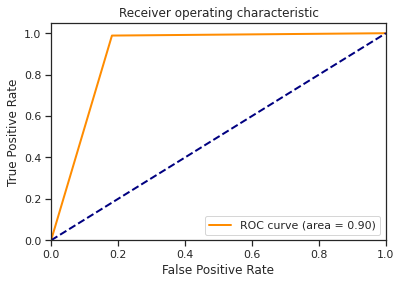

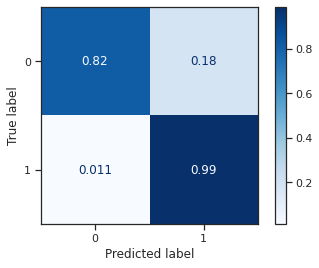

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
*****************************************************


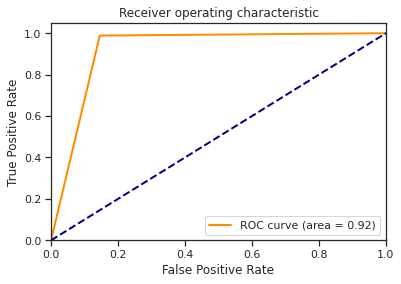

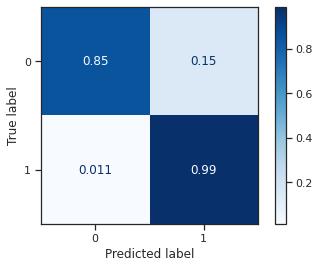

*****************************************************
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
*****************************************************


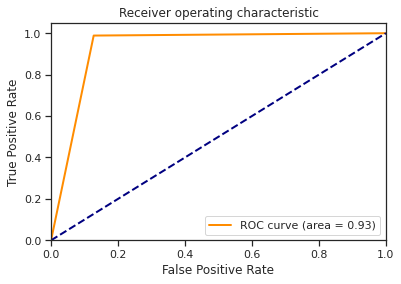

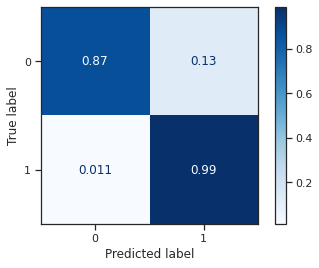

*****************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
*****************************************************


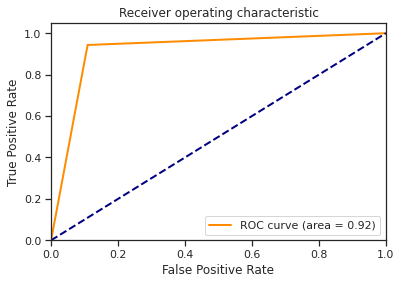

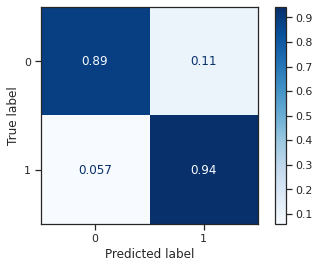

*****************************************************
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
*****************************************************


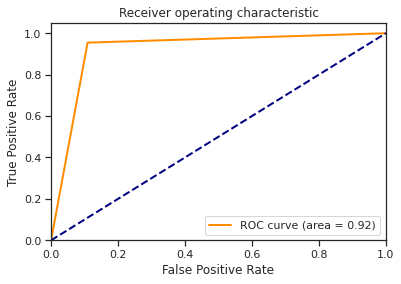

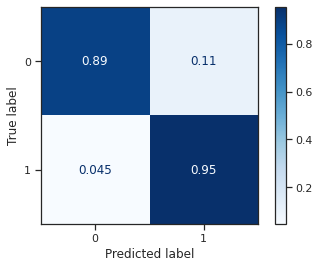

*****************************************************
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
*****************************************************


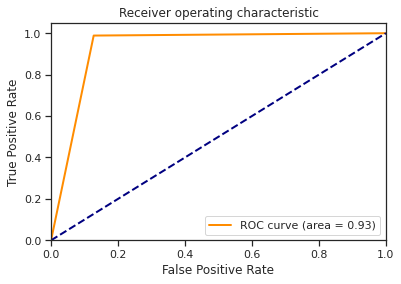

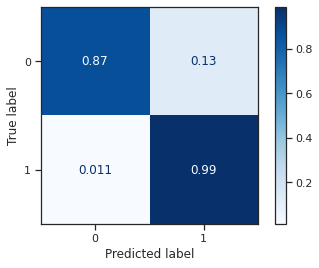

In [36]:
for model_name, model in class_models.items():
    class_train_model(model_name, model, classMetricLogger)

## 9. Подбор гиперпараметров для выбранных моделей

In [37]:
x_train.shape

(426, 6)

In [38]:
n_range = np.array(range(1,340,10))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
         131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
         261, 271, 281, 291, 301, 311, 321, 331])}]

In [39]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='roc_auc')
clf_gs.fit(x_train, y_train)

CPU times: user 2.21 s, sys: 286 µs, total: 2.21 s
Wall time: 2.21 s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': array([  1,  11,  21,  31,  41,  51,  61,  71,  81,  91, 101, 111, 121,
       131, 141, 151, 161, 171, 181, 191, 201, 211, 221, 231, 241, 251,
       261, 271, 281, 291, 301, 311, 321, 331])}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [40]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [41]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 31}

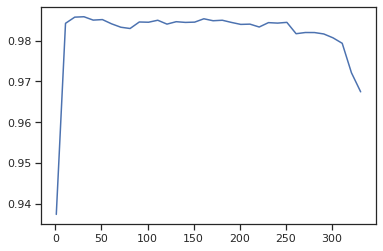

In [42]:
# Изменение качества на тестовой выборке в зависимости от К-соседей
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

## 10. Построение моделей для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей

In [43]:
class_models_grid = {'KNN_31':clf_gs.best_estimator_}

*****************************************************
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')
*****************************************************


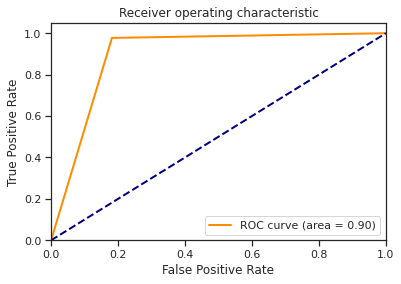

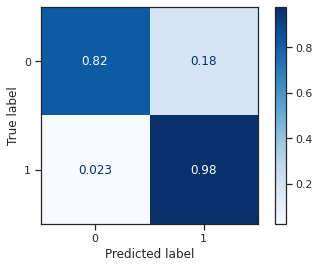

In [44]:
for model_name, model in class_models_grid.items():
    class_train_model(model_name, model, classMetricLogger)

## 11. Формирование выводов о качестве построенных моделей на основе выбранных метрик

In [45]:
# Метрики качества модели
class_metrics = classMetricLogger.df['metric'].unique()
class_metrics

array(['precision', 'recall', 'f1', 'roc_auc'], dtype=object)

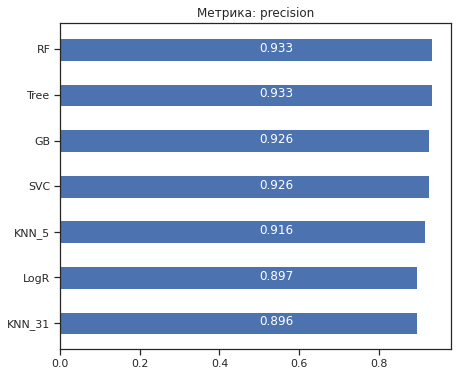

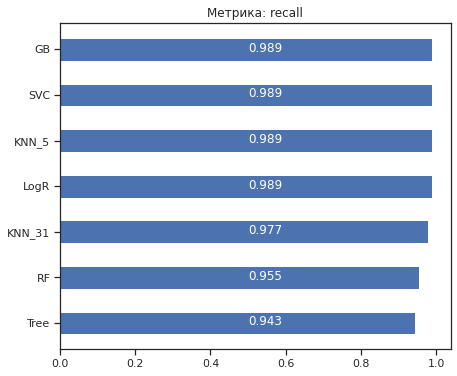

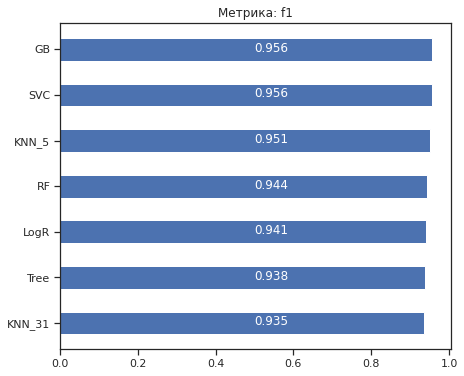

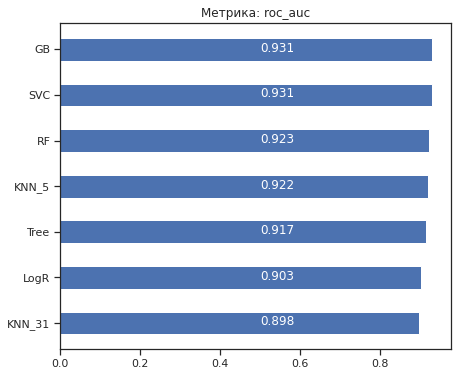

In [46]:
# Построим графики метрик качества модели
for metric in class_metrics:
    classMetricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

На основании трех метрик из четырех, лучшими оказались модели градиентного бустинга и машины опорных векторов.